In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

1.96
5.21
1.2483589227461787
1.4092196422133776


I expect that the means will get closer to 2 and 5 respectively (n * p) as the sample size increases, as the larger the sample is, the more like the population it is. The standard deviations are also likely to be smaller as they will be less affected by extreme values.

2.048
4.981
1.26952589575794
1.558409124716613


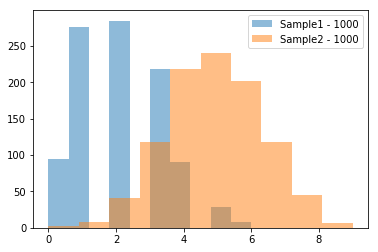

In [5]:
sample1a = np.random.choice(pop1, 1000, replace=True)
sample2a = np.random.choice(pop2, 1000, replace=True)

print(sample1a.mean())
print(sample2a.mean())
print(sample1a.std())
print(sample2a.std())

plt.hist(sample1a, alpha=0.5, label='Sample1 - 1000')
plt.hist(sample2a, alpha=0.5, label='Sample2 - 1000')
plt.legend(loc='upper right')
plt.show()

I was correct about the means but wrong about the standard deviations. Both stds increased with an increased sample size.

2.15
4.95
1.7684739183827394
1.2835497652993437


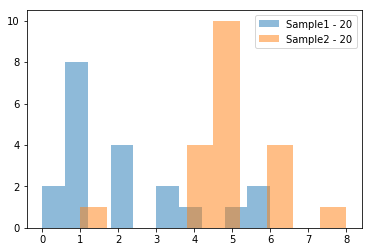

In [6]:
sample1b = np.random.choice(pop1, 20, replace=True)
sample2b = np.random.choice(pop2, 20, replace=True)

print(sample1b.mean())
print(sample2b.mean())
print(sample1b.std())
print(sample2b.std())

plt.hist(sample1b, alpha=0.5, label='Sample1 - 20')
plt.hist(sample2b, alpha=0.5, label='Sample2 - 20')
plt.legend(loc='upper right')
plt.show()

Here sample1b's std is higher than the original one but sample2b's is lower. Changes in the std are more dependent on the parameters of the distribution.

In [7]:
pop1 = np.random.binomial(10, 0.3, 10000)

In [9]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

diff = sample2.mean() - sample1.mean()

sd = np.array([sample1.std(), sample2.std()])
n = np.array([len(sample1), len(sample2)])

se = (sum(sd **2 / n)) ** 0.5

t_stat = diff / se

print(t_stat)

9.042348528611521


In [10]:
from scipy.stats import ttest_ind
print(ttest_ind(sample1, sample2, equal_var=False))

Ttest_indResult(statistic=-8.997023187907994, pvalue=1.979737367377975e-16)


In [11]:
pop1 = np.random.binomial(10, 0.4, 10000)

sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

diff = sample2.mean() - sample1.mean()

sd = np.array([sample1.std(), sample2.std()])
n = np.array([len(sample1), len(sample2)])

se = (sum(sd **2 / n)) ** 0.5

t_stat = diff / se

print(t_stat)

5.031262480977557


In [12]:
print(ttest_ind(sample1, sample2, equal_var=False))

Ttest_indResult(statistic=-5.0060429613585535, pvalue=1.2248086373304837e-06)


The t-values and p-values are getting smaller because the distributions are becoming more similar. Therefore it is more likely that the samples come from the same distribution as they get more similar.

In [23]:
pop1 = np.random.exponential(5, 10000)
pop2 = np.random.exponential(8, 10000)

print(pop1.mean())
print(pop2.mean())
print(pop1.std())
print(pop2.std())

4.99487015211391
7.868479468191028
4.916528699027282
7.752211869991954


In [24]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

4.248670195923826
7.465897741543122
3.586609268165497
7.178896986094488


In [25]:
diff = sample2.mean() - sample1.mean()

sd = np.array([sample1.std(), sample2.std()])
n = np.array([len(sample1), len(sample2)])

diff_se = (sum(sd **2 / n)) ** 0.5

t_test = diff / diff_se

print(t_test)

4.009015532328139


In [26]:
print(ttest_ind(sample1, sample2, equal_var=False))

Ttest_indResult(statistic=-3.9889200898318067, pvalue=0.00010476213028720198)


I have run the exponential one a few times and the t-values and p-values have ranged quite widely, from pvalues = 0.1 to 0.0001. I think this suggests that bigger samples are needed.

Sample means have remained fairly close.